In [13]:
import miniaudio
import numpy as np
import matplotlib.pyplot as plt

path = './SoundData/whale_noises.mp3'


In [ ]:
# Convert mp3 to wav (simulates data coming into fpga)
from pydub import AudioSegment
import os

src_folder = "./SoundData/mp3"
dst_folder = "./SoundData/wav"

for filename in os.listdir(src_folder):
    if filename.endswith(".mp3"):
        src = os.path.join(src_folder, filename)
        dst = os.path.join(dst_folder, filename.replace(".mp3", ".wav"))
        
        sound = AudioSegment.from_mp3(src)
        sound.export(dst, format="wav")



SR: 44100 Hz


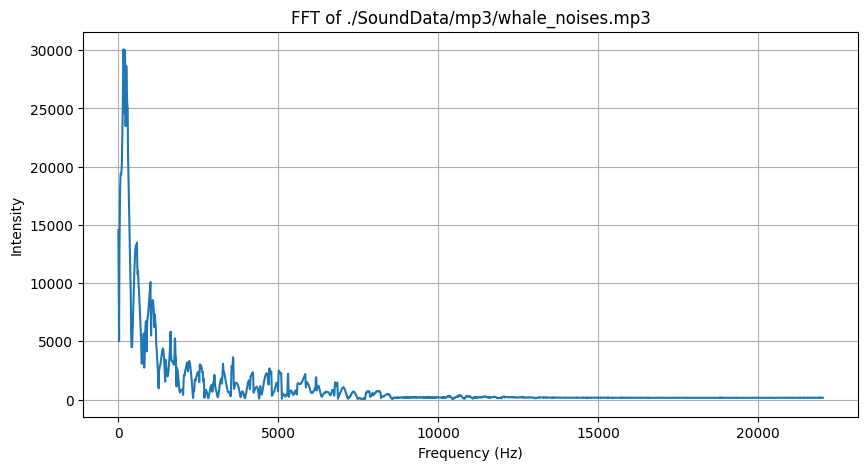

In [35]:
mp3_file = "./SoundData/mp3/whale_noises.mp3"
pcm_file = miniaudio.decode_file(mp3_file)

fs = pcm_file.sample_rate
data = np.array(pcm_file.samples)

if pcm_file.nchannels == 2:
    data = data.reshape(-1, 2)
    data = data[:, 0]  # keep only 1 channel

print(f"SR: {fs} Hz")

N = 4096
chunk = data[0 : N]

fft_output = np.fft.fft(chunk, 3500) #there isnt much high freq content here
freqs = np.fft.fftfreq(N, 1/fs)
mags = np.abs(fft_output)

plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], mags[:N//2])
plt.title(f"FFT of {mp3_file}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()